<a href="https://colab.research.google.com/github/varsantos/Data_science/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Titanic - Prevendo Sobrevivência
> Análise de dados e modelagem preditiva para prever a sobrevivência dos passageiros do Titanic usando técnicas de Machine Learning


O objetivo deste projeto é prever quais passageiros sobreviveram ou não ao naufrágio do Titanic, utilizando diversas variáveis como idade, gênero, classe social, e outros fatores. Para isso, utilizaremos uma variedade de algoritmos de *Machine Learning*, incluindo *Logistic Regression, Decision Trees, Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), e Gradient Boosting*.

[Clique aqui para acessar o dataset no Kaggle](https://www.kaggle.com/c/titanic/data)


*Realizado por [Vagner Santos](https://www.linkedin.com/in/var-santos/)*



Neste notebook, passaremos por etapas de:
- Carregamento dos dados
- Análise Exploratória de Dados (EDA)
- Limpeza e tratamento dos dados
- Engenharia de recursos (feature engineering)
- Treinamento e avaliação dos modelos

Os insights obtidos ao longo do projeto ajudarão a entender os fatores mais determinantes na sobrevivência dos passageiros.


# **1. Carregamento dos dados**

Vou fazer o ETL dos dados

In [76]:
#Carregando o dataset no Google Colab:

# Caso você esteja executando este notebook no Google Colab, podemos usar a função `files.upload()`
# para carregar arquivos diretamente do seu computador para o ambiente do Colab. Ao rodar a célula abaixo,
# um botão será exibido para que você possa selecionar o arquivo que deseja enviar.

from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [77]:
#importando bibliotecas e lendo o arquivo csv

import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')

**Dicionário dos Dados**
- `PassengerId`: IDs únicos dos passageiros
- `Survived`: Indicador de sobrevivência (0 = Não sobreviveu, 1 = Sobreviveu)
- `Pclass`: Classe do passageiro (1 = Primeira classe, 2 = Segunda classe, 3 = Terceira classe)
- `Name`: Nome do passageiro
- `Sex`: Gênero do passageiro
- `Age`: Idade do passageiro
- `SibSp`: Número de irmãos/cônjuges a bordo
- `Parch`: Número de pais/filhos a bordo
- `Ticket`: Número do bilhete
- `Fare`: Tarifa paga pelo passageiro
- `Cabin`: Número da cabine (se disponível)
- `Embarked`: Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Já podemos analisar que o `PassengerId` está bem distribuido, e todos os passageiros tem um ID, também podemos analisar que a `média de idade` é de `29 anos` e a `mediana` é de `28 anos`, mas se olhar o `"Fare"` a `média` é de `32` e temos um valor máximo de `512` assim teremos que analisar posteriormente esses dados, mas parece que  existe uma distribuição dos dados próximo do normal.

# **2. EDA - Exploratory Data Analysis**


Existe uma biblioteca de ciência de dados poderosa chamada `Ydata Profiling` ela é capaz de gerar um relatório completo e detalhado de EDA. Vou deixar anexado o relatório criado por essa biblioteca, porém vou seguir com minha própria análise.\
Mas se você quiser testá-la pode usar o código abaixo:



```
!pip install ydata-profiling
import ydata_profiling as yd

profile = yd.ProfileReport(train, title="Titanic EDA Report")
profile.to_file("titanic_EDA.html")
```
click para acessar o report automático
[TITANIC EDA REPORT](https://drive.google.com/file/d/17mznY1_CFWUfnwPIp_D3P761-7W5vy7T/view?usp=sharing)



###**Análise univariada**

A variável `Age` representa a idade dos passageiros. Para esta análise, vamos observar a distribuição etária dos passageiros a bordo.

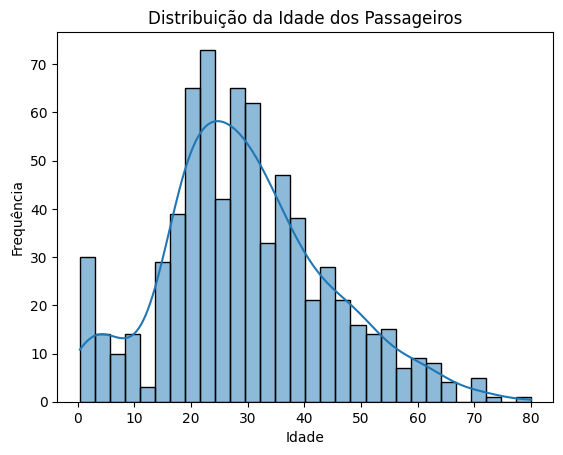

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Distribuição da Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Através do gráfico, vemos que há uma concentração de passageiros em certas faixas etárias. Além disso, será interessante ver se os passageiros mais jovens ou mais velhos têm maior probabilidade de sobreviver.

A váriavel `Survived` é o alvo do nosso modelo. Vamos visualizar a quantidade de passageiros que sobreviveram (1) e não sobreviveram (0).

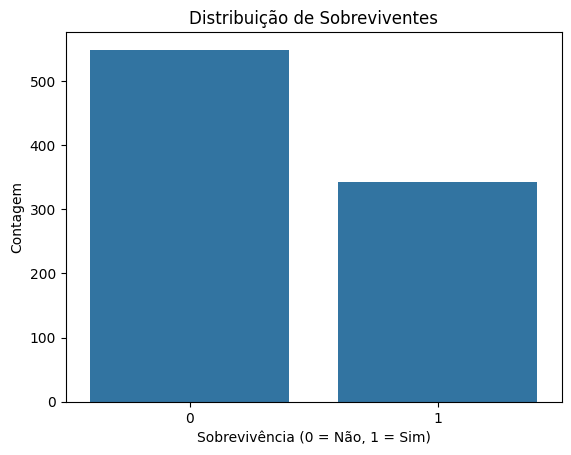

In [82]:
sns.countplot(x='Survived', data=train)
plt.title("Distribuição de Sobreviventes")
plt.xlabel('Sobrevivência (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

A váriavel `Sex` é fundamental para a análise, já que, históricamente, mulheres e crianças foram prioritárias no resgate. Vamos ver a distribuição

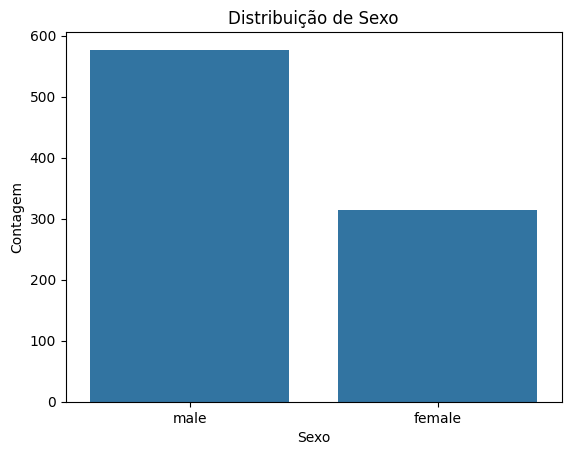

In [83]:
sns.countplot(x='Sex', data=train)
plt.title("Distribuição de Sexo")
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

A váriavel `Pclass` representa a classe da viagem dos passageiros (1ª, 2ª e 3ª classe).

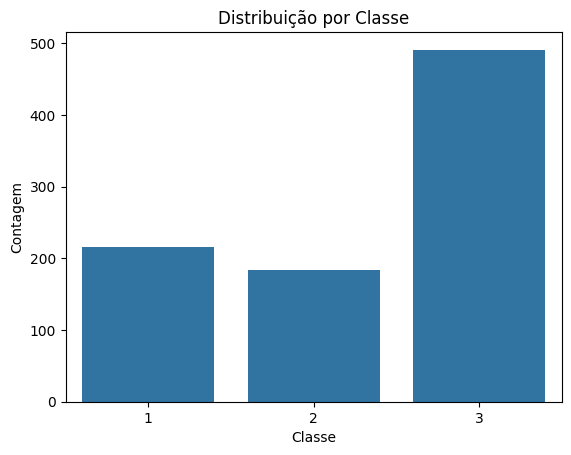

In [84]:
sns.countplot(x='Pclass', data=train)
plt.title('Distribuição por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

Aqui, vemos que temos uma grande concentração de passageiros na 3ª classe e faremos observações sobre a distribuição e possíveis relações com a taxa de sobrevência.


Com base na análise univariada, já conseguimos identificar algumas características importantes do dataset, como a distribuição de idade, gênero e classe. Essas variáveis podem ter um impacto significativo na probabilidade de sobrevivência, o que será explorado nas próximas etapas, como a análise bivariada, Análise multivariada e a modelagem preditiva.

###**Análise bivariada**

Sobrevivência vs Gênero (`Survived` vs `Sex`)\
Vamos explorar como o gênero afetou a taxa de sobrevivência. Como mencionado antes, é esperado que haja uma diferença significativa entre homens e mulheres, devido à regra "mulheres e crianças primeiro" no resgate.

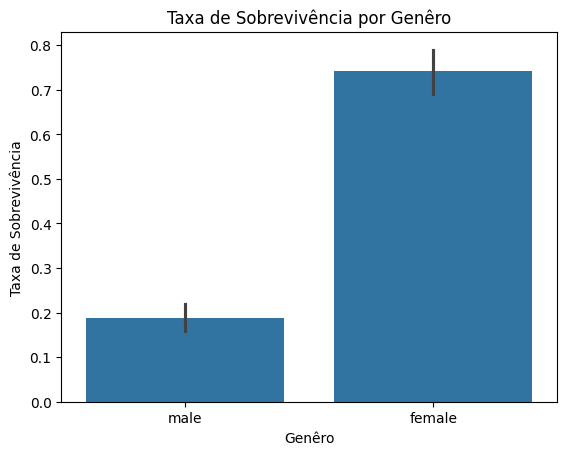

In [85]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Taxa de Sobrevivência por Genêro')
plt.xlabel('Genêro')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

Como já esperado a taxa de sobrevivência entre mulheres é maior do que a dos homens.


Sobrevivência vs Classe (`Survived` vs `Pclass`)\
Vamos investigar se a classe social teve impacto na sobrevivência dos passageiros. Passagens de 1ª classe eram mais caras, o que pode ter influenciado a probabilidade de resgate.

In [86]:
#agrupar os sobreviventes por classe usando o groupby e fazer uma contagem de vivos e mortos com coount(), e para desempilhar os dados usei o unstack()
sobreviventes_por_classe = train.groupby(['Pclass', 'Survived'])['PassengerId'].count().unstack()
sobreviventes_por_classe

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


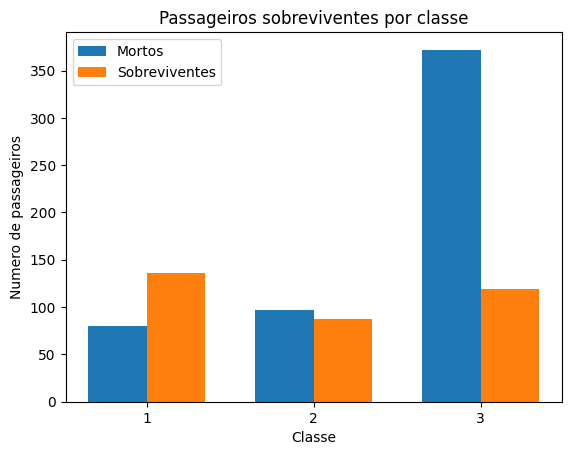

In [87]:
#definindo o tamanho do grafico e a lagura das barras
largura_barra = 0.35
posicoes = range(len(sobreviventes_por_classe.index))

plt.bar(posicoes, sobreviventes_por_classe[0], width=largura_barra, label='Mortos') #criando uma barra para os mortos
plt.bar([p + largura_barra for p in posicoes], sobreviventes_por_classe[1], largura_barra, label='Sobreviventes') #criando uma barra para os vivos

#rotulando a área do gráfico
plt.xlabel('Classe')
plt.ylabel('Numero de passageiros')
plt.title('Passageiros sobreviventes por classe')
plt.xticks([p + largura_barra / 2 for p in posicoes], sobreviventes_por_classe.index)
plt.legend()

plt.show()

Como podemos ver a porcentagem de pessoas que sobreviveram é maior entre a 1ª e 2ª classe, a 3ª mostra que ~70% dos passageiros faleceram no naufrágio.


Classe vs Embarque (`Pclass` vs `Embarked`)

Vamos entender se existe diferença entre as classes de acordo com o ponto de embarque.

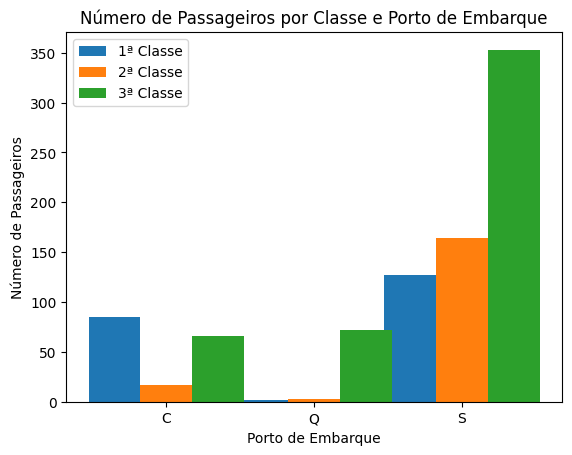

In [88]:
#vamos usar a mesma lógica do código de cima, e vamos adaptalo para o que precisamos
passageiros_por_classe = train.groupby(['Embarked', 'Pclass'])['PassengerId'].count().unstack()
passageiros_por_classe

#definindo o tamanho do grafico e a lagura das barras
largura_barra = 0.35
posicoes = np.arange(len(passageiros_por_classe.index))

plt.bar(posicoes, passageiros_por_classe[1], width=largura_barra, label='1ª Classe')  # 1ª Classe
plt.bar(posicoes + largura_barra, passageiros_por_classe[2], width=largura_barra, label='2ª Classe')  # 2ª Classe
plt.bar(posicoes + 2 * largura_barra, passageiros_por_classe[3], width=largura_barra, label='3ª Classe')  # 3ª Classe

#rotulando a área do gráfico
plt.xlabel('Porto de Embarque')
plt.ylabel('Número de Passageiros')
plt.title('Número de Passageiros por Classe e Porto de Embarque')
plt.xticks(posicoes + largura_barra, passageiros_por_classe.index)
plt.legend()

plt.show()

O gráfico acima não mostra muito uma diferença das classes em cada ponto de embarque, acredito que podemos descartar isso no futuro.

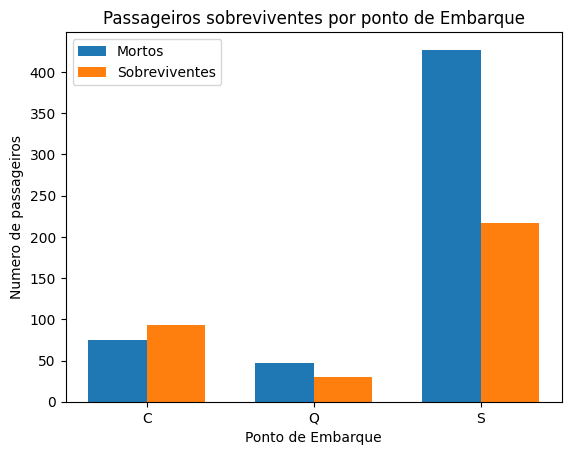

In [89]:
#agrupar os sobreviventes por classe usando o groupby e fazer uma contagem de vivos e mortos com coount(), e para desempilhar os dados usei o unstack()
sobreviventes_por_classe = train.groupby(['Embarked', 'Survived'])['PassengerId'].count().unstack()
sobreviventes_por_classe

largura_barra = 0.35
posicoes = range(len(sobreviventes_por_classe.index))

plt.bar(posicoes, sobreviventes_por_classe[0], width=largura_barra, label='Mortos') #criando uma barra para os mortos
plt.bar([p + largura_barra for p in posicoes], sobreviventes_por_classe[1], largura_barra, label='Sobreviventes') #criando uma barra para os vivos

#rotulando a área do gráfico
plt.xlabel('Ponto de Embarque')
plt.ylabel('Numero de passageiros')
plt.title('Passageiros sobreviventes por ponto de Embarque')
plt.xticks([p + largura_barra / 2 for p in posicoes], sobreviventes_por_classe.index)
plt.legend()

plt.show()

O `Embarked` é uma variável que tem baixa correlação de sobrevivencia, me parece muito mais ligado a um ponto mais famoso do que necessáriamente um onde uma classe prevaleça sobre a outra.

Sobrevivência vs Idade (`Survived` vs `Age`)\
A idade pode ser outro fator relevante para a sobrevivência. Normalmente, crianças teriam prioridade durante o resgate.

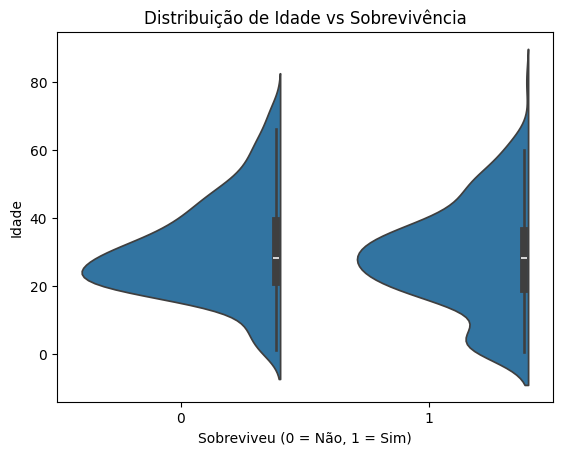

In [90]:
# Usando um gráfico de dispersão (scatter) para ver a relação entre idade e sobrevivência
sns.violinplot(x='Survived', y='Age', data=train, split=True)
plt.title('Distribuição de Idade vs Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()


Podemos ver que os jovens e crianças tiveram prioridade no resgate.

Vamos aprofundar a análise e verificar a porcetagem de chance de sobrevivência de cada classe.

In [91]:
#Chance de sobrevivência por classe
total_por_classe = sobreviventes_por_classe.sum(axis=1)
percentual_sobreviventes = sobreviventes_por_classe[1] / total_por_classe * 100
percentual_mortos = sobreviventes_por_classe[0] / total_por_classe * 100

In [92]:
#vamos concatenar essa conta ao dataset q criei pra analisar os dados de sobrevivência

porcentagens = pd.DataFrame({'Percentual Sobreviventes' : percentual_sobreviventes,'Percentual Mortos': percentual_mortos})
sobreviventes_por_classe = pd.concat([sobreviventes_por_classe, porcentagens], axis=1)
sobreviventes_por_classe

,0,1,Percentual Sobreviventes,Percentual Mortos
Embarked,,,,
C,75,93,55.357143,44.642857
Q,47,30,38.961039,61.038961
S,427,217,33.695652,66.304348


Acima percebemos que mais de 60% dos passageiros da 1º classe sobreviveram, 47% para a 2º classe, ou seja, ser da 3º classe quer dizer que você teria apenas 24% de chance de sobreviver.

Alguns insights podemos tirar da análise bivariada

* Gênero: As mulheres tiveram uma taxa de sobrevivência significativamente maior.
* Classe: Passageiros da 1ª classe tiveram mais chances de sobreviver.
* Idade: Jovens e crianças tendem a sobreviver mais que adultos.





###**Análise Multivariada**

Aqui, o foco será observar como diferentes fatores, como gênero, classe e idade, interagem entre si e impactam a variável-alvo `Survived`. Com isso, conseguimos obter insights mais profundos do que simplesmente olhar as variáveis de forma isolada.

Sobrevivência vs Gênero vs Classe (`Survived` vs `Sex` vs `Pclass`)

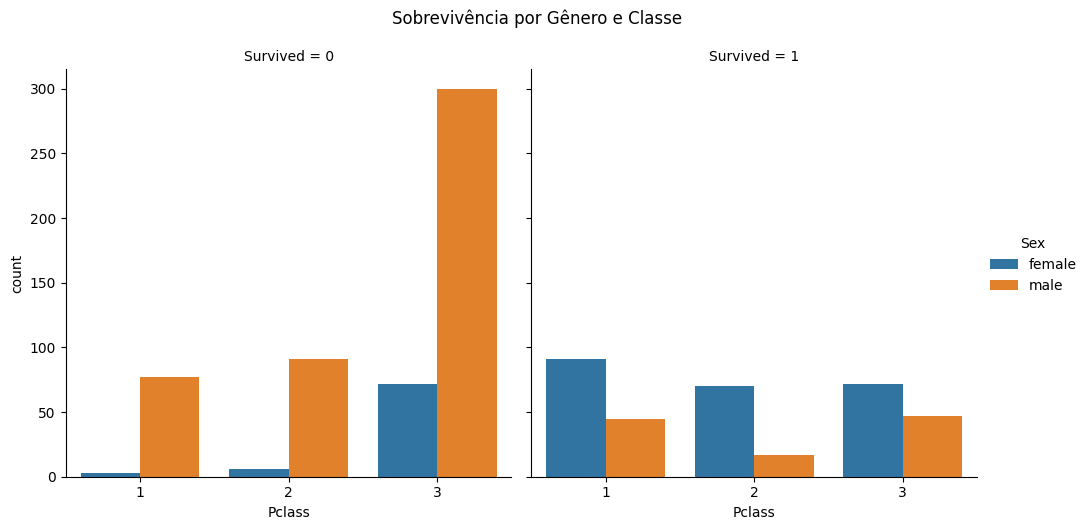

In [93]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=train)
plt.suptitle('Sobrevivência por Gênero e Classe', y=1.05)
plt.show()

Neste gráfico agora fica claro a quantidade de homens e que principalmente da 3° classe faleceram, e fica claro também que a Classe influenciou na sobrevivência.

Sobrevivência vs Gênero vs Idade (`Survived` vs `Sex` vs `Age`)\
Agora, vamos verificar como a idade interage com o gênero na probabilidade de sobrevivência. A expectativa é que mulheres jovens (crianças) tenham tido maior chance de sobrevivência.

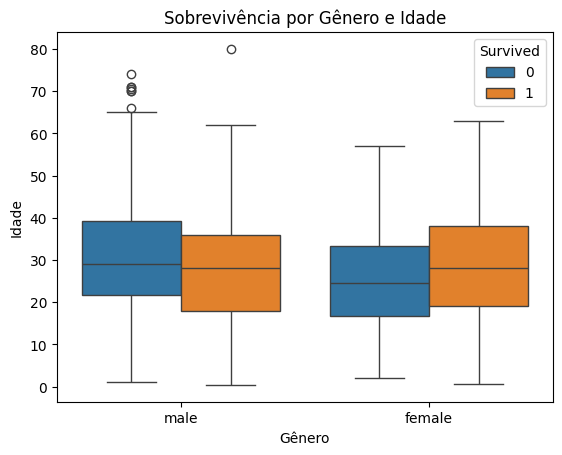

In [94]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=train)
plt.title('Sobrevivência por Gênero e Idade')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.show()

Podemos notar que a mediana dos sobreviventes está em abaixo de 30, bem como a 50% dos sobreviventes do gênero `female` está entre 21 e 38 anos e do gênero `male` está entre 18 e 37 anos.

# **3. Limpeza de tratamento dos dados**

Vamos continuar com nosso EDA e agora vamos tratar os dados, verificar se tem dados missing e outliers

### Limpeza e tratamento - Trabela train

In [95]:
train.nunique()

#podemos perceber que realmente o passengerId é único para cada passageiro, e talvez possamos desconsidera-lo na análise.

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [96]:
#verificando se temos valores nulos no dataset
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Podemos notar que temos 177 passageiros sem a idade informada, 687 sem número de cabine, e 2 sem o local de embarque.

In [97]:
#vamos verificar quem são os passageiros que não tem local de embarque

train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Buscando o nome das duas mulheres no [Encyclopedia titanica](https://www.encyclopedia-titanica.org/), conseguimos saber onde elas embarcaram, que foi no Southampton

In [98]:
#substituindo os valores nulos de embarque

train['Embarked'].fillna('S', inplace=True)
#esta funçao vai filtrar tudo que está NaN e vai substituir por "S", respeitando o dicionário de dados informados no início

<ipython-input-98-c320bdc6a804>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace=True)



Como temos 177 pessoas sem idade, é inviável fazer a mesma coisa que realizamos anteriormente, então podemos usar de técnicas estatiscas para colocar a idade dessas pessoas

<Axes: ylabel='Frequency'>

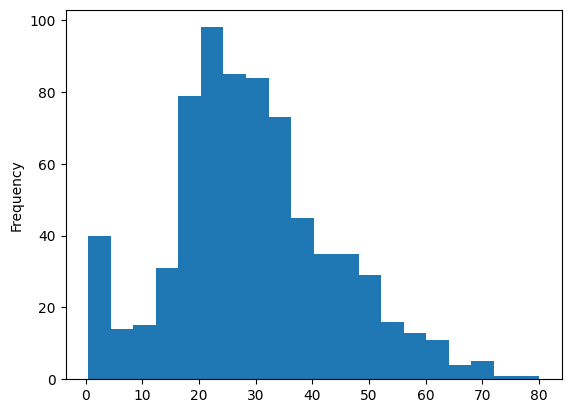

In [99]:
train.Age.plot.hist(bins=20)

Com o histograma temos uma clareza maior, podemos ver que temos bastante bebês, poucas crianças e temos um crescimento de jovens até os adultos.

Sabemos que a média é 29 anos e a mediana é de 28 anos. Será que temos diferença se abrimos isso por classe dos passageiros e/ou por gênero?

In [100]:
#verificando a média de idade por classe do Titanic

train.groupby(['Pclass', 'Sex'])['Age'].median() #Essa função vamos agrupar por classes e por idade e achar a média

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Vamos tratar os casos de `NaN` substituindo os valores pela mediana que calculamos acima.

In [101]:
train['Age'] = train.Age.fillna(train.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
#Estamos filtrando a coluna 'Age', depois pegando os valores vazios de 'Age' usando a função FILLNA para preencher estes valores usamos a função Groupby e transform para fazer a mediana da idade de acordo com o Gênero e classe.

In [102]:
#Verificando nulos novamente

train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Agora ficou faltando apenas a coluna de cabines, mas eu acredito que não seja necessário, pois o número da cabine é irrelevante na minha análise.

In [103]:
#analisando as cabines

train.Cabin.value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


:Podemos notar que as cabines não fazem muito sentido na análise e não é relevante, então eu vou retirar essa variável do dataset mais a frente.

<Axes: >

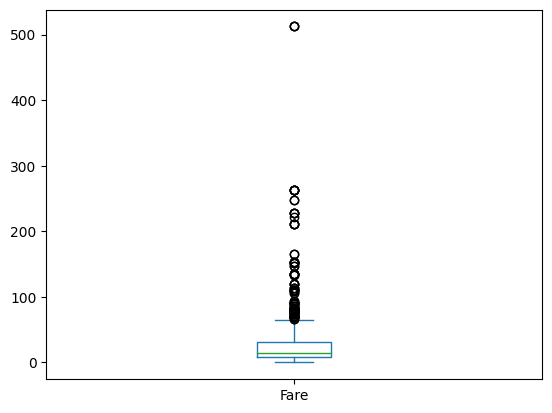

In [104]:
#outlier Fare

train.Fare.plot.box()

Podemos notar acima nos mostram que a maioria dos passageiros pagaram uma taxa inferior a `100,00`.

Mas temos esse outlier, vamos verificar o que são para identificamos o que podemos fazer

In [105]:
#filtrando o valor
train[train.Fare == train.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C



Consultei novamente os valores na [Encyclopedia titanica](https://www.encyclopedia-titanica.org/) e os valores estão corretos, e fazem sentido são passageiros de primeira classe e provavelmente ficaram na melhor cabine disponível na época.

###**1.1 Feature Selection**

Durante nosso EDA, verificamos as correlações das variaveis em vários níveis. Então agora podemos excluir essas váriáveis para que nosso modelo consiga performar melhor.

`Cabin` - Devido à alta porcentagem de valores ausentes.\
`Ticket` - Como o número do bilhete é único para cada passageiro, ele não fornece informações úteis.\
`PessengerId` - Apenas um identificador, igual o `Ticket`.\
`Embarked` - Embora possa ter uma leve correlação com a sobrevivência, sua contribuição pode ser mínima comparada a outras variáveis mais importantes (como `Pclass`, `Sex`, `Age`)\

Podemos usar também um modelo para quantificar melhor quais variáveis tem mais importância usando teste estatísticos, mas para isso precisamos transformar todas as variáveis do tipo *Object* em númericas. Logo a mais a frente usaremos métodos estatísticos para selecionar uma feature.

In [106]:
#excluindo as coluna Ticket e Embarked e Cabin
train = train.drop(columns=['Ticket', 'Embarked', 'Cabin', 'PassengerId'], axis=1)

### Feature Engineering - Tabela train

Os modelos de machine learning não entendem variáveis do tipo `Object` vamos transformar os dos em números usando a função One-hot enconding

In [107]:
#codificando a coluna Sex
train = pd.get_dummies(train, columns=['Sex'], prefix='Sex')

no código acima, vamos transformar as variáveis `"male"` e `"famale"` em `1` e `0` e depois coloca-lás em colunas separadas para os algorítmos calcularem melhor essa relação entre o gênero e a sobrevivência.

In [108]:
#Verificando os nomes
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Visualizando os títulos únicos
print(train['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


No código acima utilizamos a função `apply(lambda x:` que acessa cada variável da coluna `'Name'` que é representado por `x`.

Depois aplicamos as funções `.split` para separar os titulos dos nomes como `"Braund, Mr. Owen Harris"` conseguimos deixar apenas o `"Mr."`







In [109]:
#convertendo os títulos em categorias mais gerais
train['Title'] = train['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [110]:
#usando One-Hot Enconding para Title
train = pd.get_dummies(train, columns=['Title'], drop_first=True)

In [111]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,True,False,True,False,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,True,False,False,False,True,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,True,False,True,False,False,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,True,False,False,False,True,False
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,False,True,False,True,False,False


In [112]:
train = train.drop(['Name'], axis=1)

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,1,0,7.2500,False,True,False,True,False,False
1,1,1,38.0,1,0,71.2833,True,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,True,False,True,False,False,False
3,1,1,35.0,1,0,53.1000,True,False,False,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,False,True,False,False


Uma outra análise que podemos fazer agora é a `Matrix de Correlação`

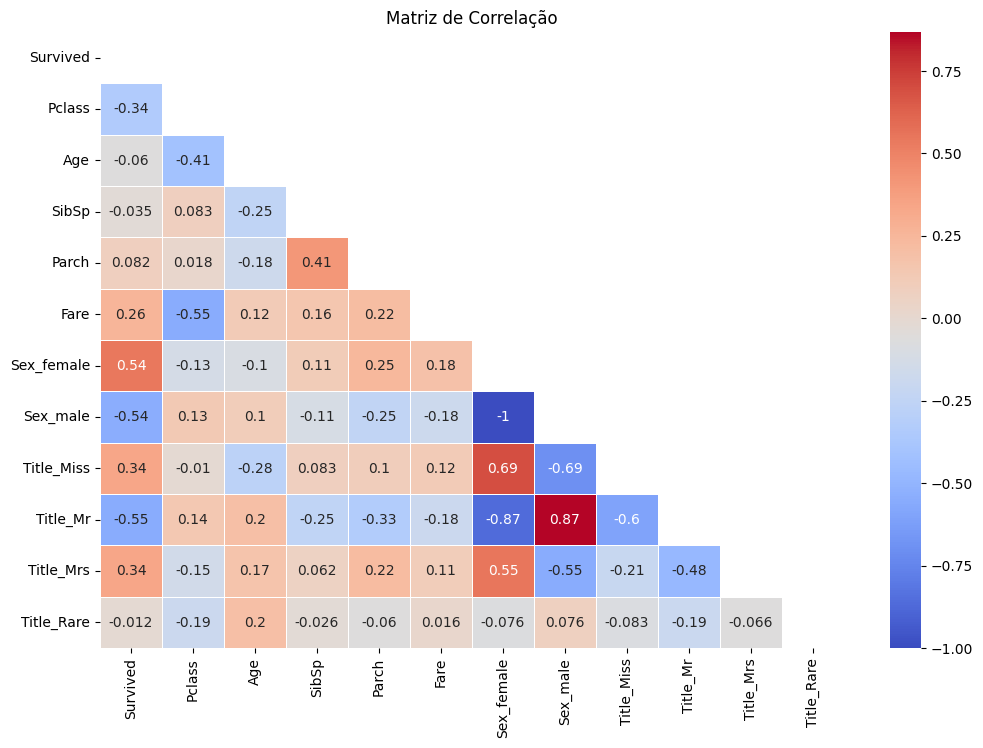

In [113]:
matriz_corr = train.corr()

mascara = np.triu(np.ones_like(matriz_corr, dtype=bool))

plt.figure(figsize=(12,8))
sns.heatmap(matriz_corr, mask=mascara, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Olhando a Matriz conseguimos entender que o Gênero, classe e fare tem correlação significantes com a sobreviência.

### Limpeza e tratamento - Tabela Test

Aplicamos todas esses tratamentos de dados para a Tabela de Train, porém esse arquivo do Titanic conta com 3 arquivos

*   Train.csv
*   Test.csv
*   Gender_submission.csv - *esse terceiro dataset é o banco de dados onde temos o PessengerId e o Survived.*

Agora precisamos aplicar todo o tratamento de dados também para a base de Test.csv.

Mas será que temos os mesmos campos nulos no Test.csv?







In [114]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Através do `info()` podemos já notar que temos uma coluna diferente é a `"Fare"`, ela está com 1 dado faltante. Do restante temos `"Age"` e `"Cabin"` com dados faltantes igual no dataset `Train.csv`

Vamos confirmar esses valores Nulos e tratá-los

In [115]:
test.isnull().sum().sort_values(ascending=False).head()
#ISNUL para filtrar apenas valores nulos
#SUM para contar quantos valores nulos temos
#SORT_VALUES para ordenar as variaveis que mais tem nulos de cima para baixo

,0
Cabin,327
Age,86
Fare,1
PassengerId,0
Pclass,0


In [116]:
#Como temos o mesmo campo de idade com nulos igual a Train, podemos fazer o mesmo tratamento da base Train

test['Age'] = test.Age.fillna(test.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

Agora que tratamos a idade com os mesmos parâmetros da `"train.csv"`, podemos olhar esse valor único do `"Fare"`, Vamos buscar no [Encyclopedia titanica](https://www.encyclopedia-titanica.org/) e vamos verificar o valor da Taxa que esse passageiro pagou


In [117]:
#verificando quem é o passageiro
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


após analisar o dado de Fare, vamos tratar o dado faltante, pois como é apenas uma única informação podemos inseri-la manualmente sem problemas.

In [118]:
test['Fare'] = test.Fare.fillna('7')

atribuindo o valor 7 na Taxa de passgeiro, o valor 7 é o que encontramos na enciclopedia titanica.


In [119]:
#confirmando a alteração de valor

test[test['PassengerId'] == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7,NaN,S


In [120]:
#excluindo as colunas Ticket, Cabin e Embarked também da tabela Teste
test = test.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)

### Feature Engineering - Tabela Test

Vamos aplicar a técnica de `One-Hot Encoding` na tabela de `test.csv`

In [121]:
#codificando a coluna Sex
test = pd.get_dummies(test, columns=['Sex'], prefix='Sex')

#separando os títulos
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

#convertendo os títulos em categorias mais gerais
test['Title'] = test['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

#codificando Title
test = pd.get_dummies(test, columns=['Title'], drop_first=True)


In [122]:
#drop da coluna Name
test = test.drop(['Name'], axis=1)

In [123]:
#verificando o data set de Test

test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,34.5,0,0,7.8292,False,True,False,True,False,False
1,893,3,47.0,1,0,7.0,True,False,False,False,True,False
2,894,2,62.0,0,0,9.6875,False,True,False,True,False,False
3,895,3,27.0,0,0,8.6625,False,True,False,True,False,False
4,896,3,22.0,1,1,12.2875,True,False,False,False,True,False


In [124]:
#verificando se as duas tabelas estão iguais
train.columns.equals(test.columns)

False

Aqui vai dar `False`, pois o dataset de treino tem a coluna `"SurviveId"` e a teste não tem, justamente para a gente poder treinar o modelo para então testa-lo sem essa coluna target.

E Assim teremos as bases  finais para iniciar um modelo de Machine Learning

In [125]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,1,0,7.2500,False,True,False,True,False,False
1,1,1,38.0,1,0,71.2833,True,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,True,False,True,False,False,False
3,1,1,35.0,1,0,53.1000,True,False,False,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,False,True,False,False


In [126]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,34.5,0,0,7.8292,False,True,False,True,False,False
1,893,3,47.0,1,0,7.0,True,False,False,False,True,False
2,894,2,62.0,0,0,9.6875,False,True,False,True,False,False
3,895,3,27.0,0,0,8.6625,False,True,False,True,False,False
4,896,3,22.0,1,1,12.2875,True,False,False,False,True,False


### 1.2 Feature Selection

Agora que já transformamos todas as variáveis em númericas podemos usar testes estatísticos para verificar a importância das variáveis.

Vamos usar o *Random Forest* e vamos usar o teste *feature importances*, pois ele captura as relações não lineares, esse algoritimo faz uma abordagem direta, rápida e mais simples.

In [127]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis = 1)
y = train['Survived']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importantes = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importantes': importantes})
feature_importances_df = feature_importances_df.sort_values(by='Importantes', ascending=False)

print(feature_importances_df)

       Feature  Importantes
4         Fare     0.270179
1          Age     0.230521
8     Title_Mr     0.120512
6     Sex_male     0.089674
0       Pclass     0.081483
5   Sex_female     0.069204
2        SibSp     0.055925
3        Parch     0.032392
9    Title_Mrs     0.027361
7   Title_Miss     0.016964
10  Title_Rare     0.005784


Com base no teste acima, Title_Rare e Title_Miss mas vamos verificar mais a frente como os modelos ficarão com e sem essas variaveis pra ver a performance.

O `Boruta` por sua vez faz um cálculo mais sofisticado e robusto para as variáveis mais importantes, ele cria variáveis sombras e mistura com as verdadeiras, então compara o resultado dessas sombras com as verdadeiras, se esse o resultado do real for mais consistente do que o falso, ele vai considerar essa variável importante, caso não seja, ela é descartada.

In [128]:
#instalando o boruta
!pip install boruta

In [129]:
from boruta import BorutaPy



rf2 = RandomForestClassifier(n_estimators=100, random_state=42)

boruta = BorutaPy(rf2, n_estimators='auto', random_state=42)
boruta.fit(X.values, y.values)

print("Features Importantes: ", X.columns[boruta.support_].tolist())
print("Features Tentativas: ", X.columns[boruta.support_weak_].tolist())
print("Features Rejeitadas: ", X.columns[~boruta.support_].tolist())

# Filtrando o dataset para incluir apenas as features importantes
X_boruta = X.loc[:, boruta.support_]

print("Número de features importantes selecionadas:", X_boruta.shape[1])

Features Importantes:  ['Age', 'Fare', 'Sex_female', 'Title_Mr']
Features Tentativas:  []
Features Rejeitadas:  ['Pclass', 'SibSp', 'Parch', 'Sex_male', 'Title_Miss', 'Title_Mrs', 'Title_Rare']
Número de features importantes selecionadas: 4


Como podemos notar os dois algoritimos deram quase as mesmas features como resultado, exceto que pela boruta, que identificou que o `Sex_female` como importante, e como já sabemos que as mulheres tiveram mais chance de sobreviência comparado aos homens, vamos usa-la mais a frente.

#**4. Treinamento de modelos**

Durante o curso na coderhouse foi apresentando vários modelos, e agora eu vou aplicá-los para entender qual prevê o melhor resultado e assim fazer uma melhor decisão.

Modelos que serão testados:



*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Decision Trees
*   Random Forest
*   Support Vector Machine (SVM)
*   Gradient Boosting

Esses são os modelos mais populares para algoritmos supervisionados de Machine learning usados em tarefa de classificação, onde o objetivo é prever uma variável binária (0 ou 1), neste caso se o passageiro sobreviveu ou não.


In [130]:
#Separando o modelo para treino e teste dos modelos

# separando a base em 30% para teste e instanciando 42 para quem rodar obter o mesmo resultado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [131]:
#importando modelos

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

*Todos os modelos a seguir serão treinados com seus parâmetros padrões, após verificar qual tem a maior acurácia vamos ajustar os hiperparâmetros para ter um melhor resultado*

**Logistic Regression**

Este modelo é usado para prever uma probabilidade de uma variavél de saída binária, ela usa a função sigmoide que prevê um resultado entre `0` e `1`.




In [132]:
from sklearn.preprocessing import StandardScaler

#como temos variaveis muito discrepantes como idade variando de 0 a 80, temos a variavel Fare que é de 0 a 512, precisamos padronizar os dados de treino e teste.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

**K-Nearest Neighbors (KNN)**

Este modelo é usado para classificar um novo dado comparando com o dado de treinamento, ele busca os `k` vizinhos mais próximos (em termos de distância) no espaço das features e classifica o dado com base no mais comum entre os vizinhos.





In [133]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

**Decision Tree**

Este modelo divide os dados em subsets baseados em regras condicionais, cada nó da árvore representa uma condição da decisão , e as folhas representam as classificações finais.

Temos que só tomar cuidado para não dar Overfitting, que é ajustar demais os dados, se a arvore for muito profunda

In [134]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree =  decision_tree.predict(X_test)
accuracy_decision_tree =  accuracy_score(y_test, y_pred_decision_tree)

**Random Forest**

Este modelo é um ensemble de muitas arvóres de decisão, ele treina várias árvores em subconjutos diferentes de dados e combina suas previsões, usando a maioria dos resultados para a classificação. Ele é mais potente que o Decision Tree e muito bom contra Overfitting

In [135]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

**Support Vector Machine (SVM)**

Este modelo busca encontrar um hiperplano que melhor separa as classes no espaço de features. Ele maximiza a margem entre as classes e os dados  mais próximos do vetores de suporte.

In [136]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_train)
accuracy_svm = accuracy_score(y_train, y_pred_svm)

**Gradient Boosting**

Este modelo é muito parecido com o Random Forest, pois ele usa o mesmo método de ensemble, mas as árvores são treinadas em sequencia, e cada nova árvore tenta corrigir os erros da árvore anterior, assim otimizando a função de perda.

Mas ela é muito sucetível a overfitting se não for bem regulada.

In [137]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_train)
accuracy_gradient_boosting = accuracy_score(y_train, y_pred_gradient_boosting)

#**5. Avaliação de Desempenho**

##**Métricas**

**Acurácia**\
Essa métrica é usada para calcular a proporção da previsão certas que o modelo faz em relação ao total de previsões.

In [138]:
print(f"Acurácia do modelo de Regressão Logística: {accuracy_log_reg}")
print(f"Acurácia do modelo de K-Nearest Neighbors: {accuracy_knn}")
print(f"Acurácia do modelo de Decision Tree: {accuracy_decision_tree}")
print(f"Acurácia do modelo de Random Forest: {accuracy_random_forest}")
print(f"Acurácia do modelo de Support Vector Machine: {accuracy_svm}")
print(f"Acurácia do modelo de Gradient Boosting: {accuracy_gradient_boosting}")

Acurácia do modelo de Regressão Logística: 0.8208955223880597
Acurácia do modelo de K-Nearest Neighbors: 0.7089552238805971
Acurácia do modelo de Decision Tree: 0.7723880597014925
Acurácia do modelo de Random Forest: 0.8059701492537313
Acurácia do modelo de Support Vector Machine: 0.6709470304975923
Acurácia do modelo de Gradient Boosting: 0.9117174959871589


Vamos usar outras métricas para entender melhor se o modelo realmente acertou o que tinha que acertar, para isso vamos usar a matriz de confusão, precisão e F1-score

Relatório de classificação - Regressão logística:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       157
           1       0.81      0.74      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

Precisão (Precision) - Regressão logística: 0.8119
F1-Score - Regressão logística: 0.7736


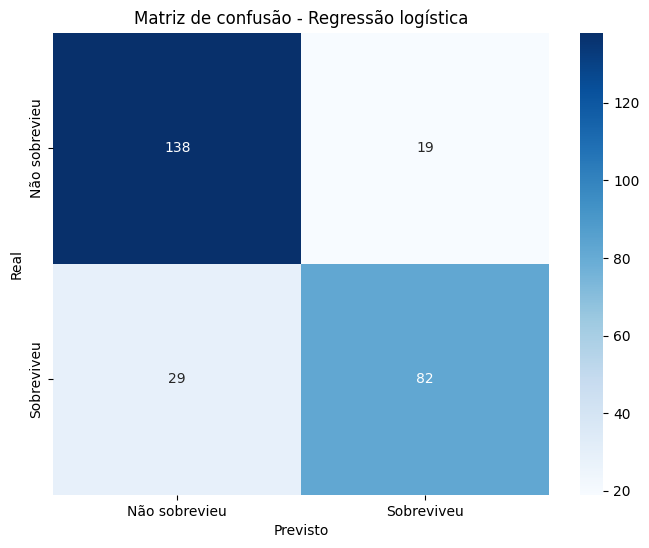

Relatório de classificação - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       157
           1       0.68      0.57      0.62       111

    accuracy                           0.71       268
   macro avg       0.70      0.69      0.69       268
weighted avg       0.71      0.71      0.70       268

Precisão (Precision) - K-Nearest Neighbors: 0.6774
F1-Score - K-Nearest Neighbors: 0.6176


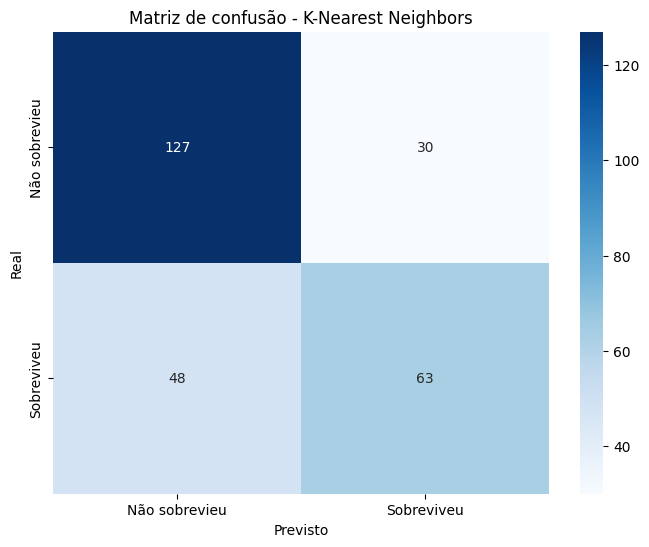

Relatório de classificação - Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       157
           1       0.76      0.66      0.71       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

Precisão (Precision) - Decision Tree: 0.7604
F1-Score - Decision Tree: 0.7053


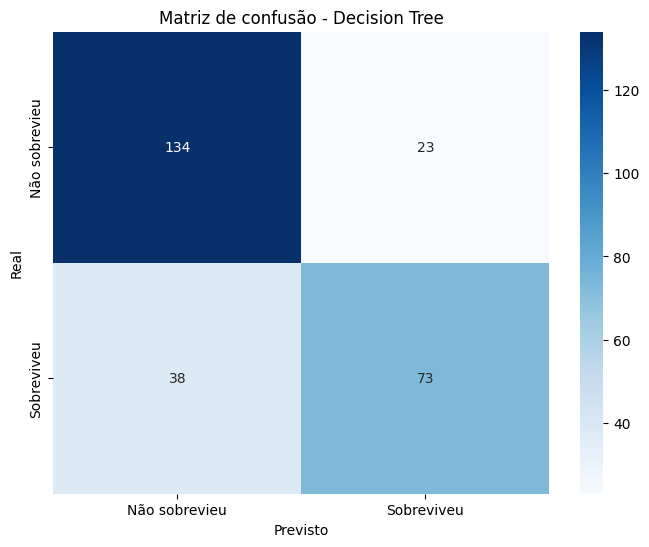

Relatório de classificação - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

Precisão (Precision) - Random Forest: 0.7864
F1-Score - Random Forest: 0.7570


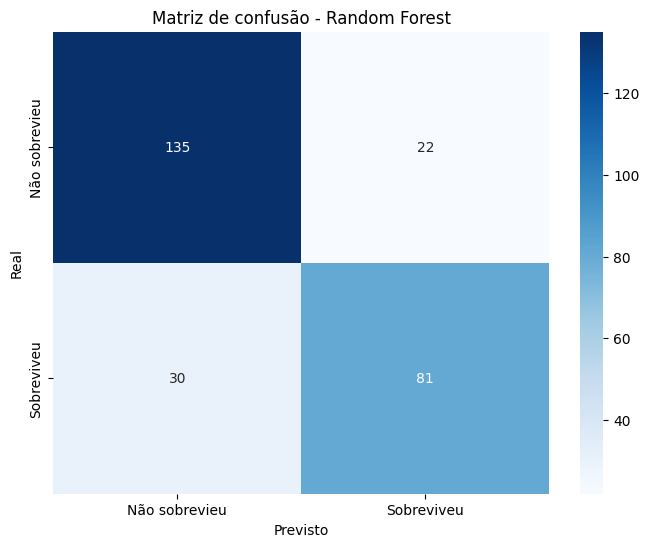

Relatório de classificação - Support Vector Machine:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       157
           1       0.75      0.27      0.40       111

    accuracy                           0.66       268
   macro avg       0.70      0.60      0.58       268
weighted avg       0.69      0.66      0.61       268

Precisão (Precision) - Support Vector Machine: 0.7500
F1-Score - Support Vector Machine: 0.3974


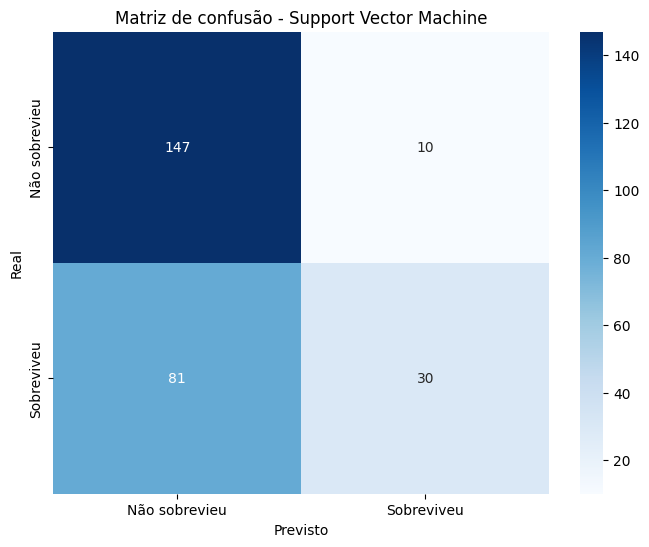

Relatório de classificação - Gradient Boosting:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       157
           1       0.84      0.65      0.73       111

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268

Precisão (Precision) - Gradient Boosting: 0.8372
F1-Score - Gradient Boosting: 0.7310


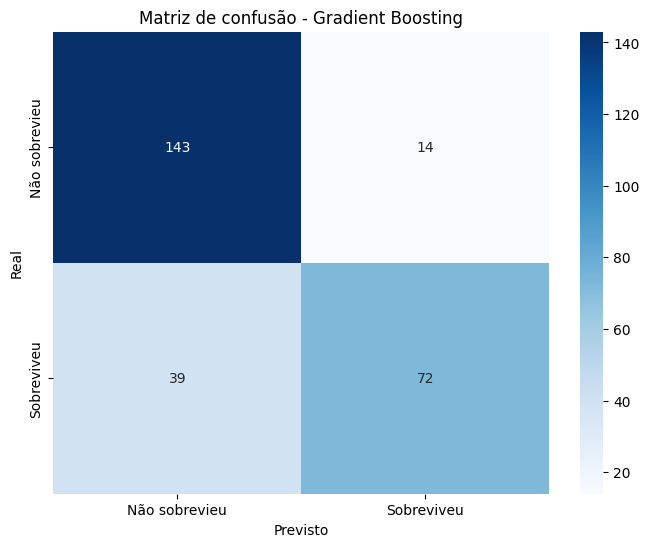

Relatório de classificação - Gradient Boosting GSCV:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       157
           1       0.88      0.66      0.75       111

    accuracy                           0.82       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268

Precisão (Precision) - Gradient Boosting GSCV: 0.8795
F1-Score - Gradient Boosting GSCV: 0.7526


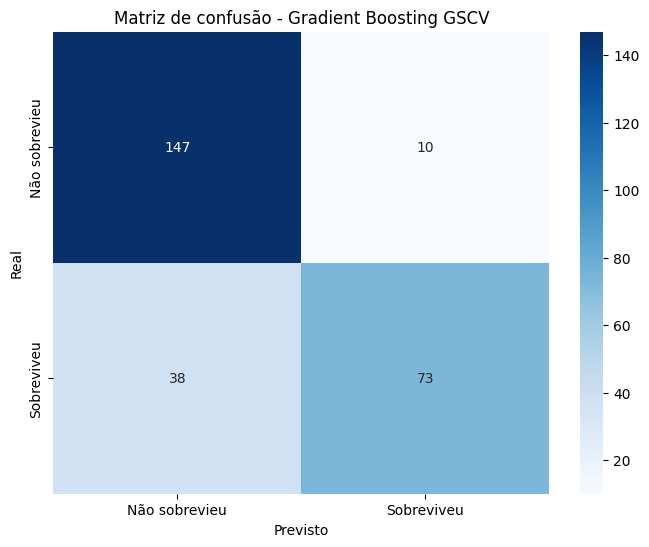

In [139]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score

def avaliar_modelo(nome_modelo, y_test, y_pred):
  print(f"Relatório de classificação - {nome_modelo}:")
  print(classification_report(y_test, y_pred))

  precisao = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"Precisão (Precision) - {nome_modelo}: {precisao:.4f}")
  print(f"F1-Score - {nome_modelo}: {f1:.4f}")

  cm=confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não sobrevieu', 'Sobreviveu'], yticklabels=['Não sobrevieu', 'Sobreviveu'])
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title(f'Matriz de confusão - {nome_modelo}')
  plt.show()

y_pred_log_reg = log_reg.predict(X_test_scaled)
avaliar_modelo('Regressão logística', y_test, y_pred_log_reg)

y_pred_knn = knn.predict(X_test)
avaliar_modelo('K-Nearest Neighbors', y_test, y_pred_knn)

y_pred_decision_tree = decision_tree.predict(X_test)
avaliar_modelo('Decision Tree', y_test, y_pred_decision_tree)

y_pred_random_forest = random_forest.predict(X_test)
avaliar_modelo('Random Forest', y_test, y_pred_random_forest)

y_pred_svm = svm.predict(X_test)
avaliar_modelo('Support Vector Machine', y_test, y_pred_svm)

y_pred_gradient_boosting = gradient_boosting.predict(X_test)
avaliar_modelo('Gradient Boosting', y_test, y_pred_gradient_boosting)

gb_grid_prediction = gb_grid.predict(X_test)
avaliar_modelo('Gradient Boosting GSCV', y_test, gb_grid_prediction)

O modelo que teve o melhor desempenho foi o *Gradient Boosting*, pois nos apresentou uma maior acurácia como também uma melhor precisão e bom F1-Score. Vamos agora aplicar as features selecionadas pelo *Boruta* e ver como o modelo perfoma.

##**GridSearchSV**
Vamos aplicar o algoritimo de *GridSearchCV* para testar diferente tipos de combinações de *Tuning dos hiperparâmetros* e encontrar uma melhor configuração.

In [152]:
from sklearn.model_selection import GridSearchCV

X2 = X_boruta

#usando as features Boruta e o y para a divisão de treino e teste
X_train_boruta, X_test_boruta, y_train_boruta, y_test_boruta = train_test_split(X2, y, test_size=0.20, random_state=42)


#treinando modelo
gb_boruta = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'warm_start': [True],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.8, 1.0],
    'max_features':['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=gb_boruta, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train_boruta, y_train_boruta)

#pegando o melhor modelo
melhor_modelo = grid_search.best_estimator_
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia durante o treinamento (cross-validation):", grid_search.best_score_)

y_pred_best = melhor_modelo.predict(X_test_boruta)


Fitting 3 folds for each of 1944 candidates, totalling 5832 fits
Melhores parâmetros: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8, 'warm_start': True}
Melhor acurácia durante o treinamento (cross-validation): 0.8090214988949166


In [153]:
#treinando com o tuning de hiperparametros GridSearchCV

#iniando o modelo com os parametros
gb_grid = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8, warm_start=True )

#treinando
gb_grid.fit(X_train_boruta, y_train_boruta)

#fazendo previsão no conjunto treino
gb_grid_prediction = gb_grid.predict(X_train_boruta)

#matrix de confusão
conf_matrix = confusion_matrix(y_train_boruta, gb_grid_prediction)
print('Matriz de confusão:')
print(conf_matrix)

#Precisão, F1-score e Acurácia
precision = precision_score(y_train_boruta, gb_grid_prediction)
f1 = f1_score(y_train_boruta, gb_grid_prediction)
acc_gbg = accuracy_score(y_train_boruta, gb_grid_prediction)

print(f'Precisão (Precision): {precision:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Acurácia: {acc_gbg:.4f}')

print("\nRelatório de Classificação:")
print(classification_report(y_train_boruta, gb_grid_prediction))

Matriz de confusão:
[[423  21]
 [ 43 225]]
Precisão (Precision): 0.9146
F1-Score: 0.8755
Acurácia: 0.9101

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       444
           1       0.91      0.84      0.88       268

    accuracy                           0.91       712
   macro avg       0.91      0.90      0.90       712
weighted avg       0.91      0.91      0.91       712



In [154]:
#Testando com os dados de Teste

#iniando o modelo com os parametros
gb_grid = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8, warm_start=True )

#treinando
gb_grid.fit(X_train_boruta, y_train_boruta)

#fazendo previsão no conjunto treino
test_prediction = gb_grid.predict(X_test_boruta)

#matrix de confusão
conf_matrix = confusion_matrix(y_test_boruta, test_prediction)
print('Matriz de confusão:')
print(conf_matrix)

#Precisão, F1-score e Acurácia
precision_test = precision_score(y_test_boruta, test_prediction)
f1_test = f1_score(y_test_boruta, test_prediction)
acc_test = accuracy_score(y_test_boruta, test_prediction)

print(f'Precisão (Precision): {precision:.4f}')
print(f'Precisão Test (Precision): {precision_test:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'F1-Score Test: {f1_test:.4f}')
print(f'Acurácia: {acc_gbg:.4f}')
print(f'Acurácia Test: {acc_test:.4f}')

print("\nRelatório de Classificação:")
print(classification_report(y_test_boruta, test_prediction))

Matriz de confusão:
[[93 12]
 [20 54]]
Precisão (Precision): 0.9146
Precisão Test (Precision): 0.8182
F1-Score: 0.8755
F1-Score Test: 0.7714
Acurácia: 0.9101
Acurácia Test: 0.8212

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



##**Testando o modelo treinado no Test.csv**

In [155]:
print(X_train.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')


In [156]:
#Selecionando as colunas do Boruta e separando o PassengerId
passengers_id = test['PassengerId']

selected_columns =  ['Age', 'Fare', 'Sex_female', 'Title_Mr']

test_selected = test[selected_columns]

In [157]:
#Fazendo a previsão
test_official = gb_grid.predict(test_selected)

result = pd.DataFrame({'PassengerId': passengers_id, 'Survived': test_official}).to_csv('submission.csv', index=False)

#**6. Conclusão**